# <center><font color = 'green'>PUBG GAME PREDICTION </font></center>

# <center><img src= "https://media.giphy.com/media/CPKPjSlBhiqbhOZoOR/giphy.gif"></center>

## Table Content
1. [Importing Libraries](#import)
2. [Reading Data](#import)
3. [Data Wrangling](#import)
4. [Feature Engineering](#import)
5. [ML Catboost model](#import) 

# Importing Libraries <a class="anchor" id="import"></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Reading Data<a class="anchor" id="import"></a>

In [2]:
df=pd.read_csv('PUBG_Game_Prediction_data.csv')

In [3]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
df.shape

(4446966, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

# Data Wrangling<a class="anchor" id="import"></a>

### Checking for null values in win Prediction Value

In [6]:
df['winPlacePerc'].isnull().sum()

1

In [7]:
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [8]:
df.drop(2744604,inplace=True)

In [9]:
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


### Understanding Player distribution in a game

In [10]:
df['players']=df.groupby('matchId')['matchId'].transform('count')

In [11]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,players
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


### Analysing the data

#### Kills without moving?

In [12]:
df['totaldistance']=df['rideDistance']+df['walkDistance']+df['swimDistance'] 
df['killswithoutmoving']=((df['kills']>0) & (df['totaldistance']==0))

In [13]:
df[df['killswithoutmoving']==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,players,totaldistance,killswithoutmoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [14]:
df[df['killswithoutmoving']==True].shape

(1535, 32)

In [15]:
df.drop(df[df['killswithoutmoving']==True].index,inplace=True)

In [16]:
df.shape

(4445430, 32)

#### Extraordinary Kills

In [17]:
df[df['roadKills']>5].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,players,totaldistance,killswithoutmoving
39338,0097d2ae7a8576,b61edfa0c228d4,a786011fe206e9,1,2,495.7,4,0,0,2,...,0.0,0,0,72.80,1,0,0.9362,92,5202.80,False
90312,0e6ea81fd1b9b3,1e96ac916d6fbb,3f150f3834422c,2,6,190.0,0,0,5,2,...,0.0,0,1,976.80,4,0,0.9556,89,4257.80,False
197752,6cf1efa197bcc1,28df010b29a9e2,2e40495266529f,0,2,800.0,5,0,4,1,...,0.0,0,0,1516.00,3,0,0.6538,89,10085.00,False
209676,5df28fce2b8128,32a01a5517635a,ee9fb50eb0fe00,0,3,360.0,2,0,4,1,...,0.0,0,0,36.96,0,0,1.0000,59,6142.96,False
213544,612ee3024560a3,ab0162b0300c59,7c5535bfd43592,1,2,426.3,3,0,0,1,...,0.0,0,0,128.30,3,0,0.9167,96,3607.30,False


In [18]:
df.drop(df[df['roadKills']>5].index,inplace=True)

#### So many kills

<AxesSubplot:xlabel='kills', ylabel='count'>

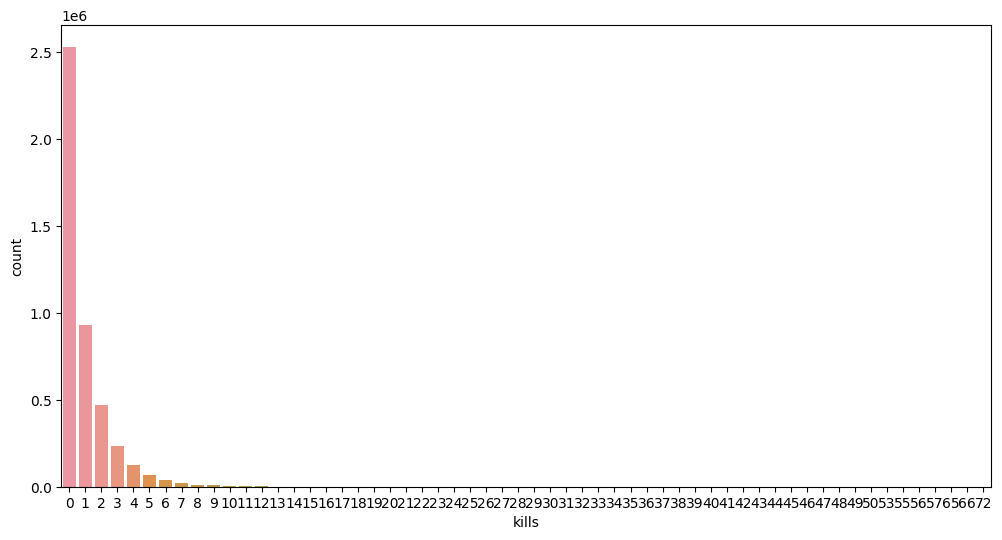

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['kills'],data=df)

#### So by graph average is 5-10 kills....above that is extraordinary

In [20]:
df[df['kills']>=15].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,players,totaldistance,killswithoutmoving
1292,919f57a28a5e02,79a34f910375bc,b181e5bc4f0c1d,6,0,1750.0,0,6,2,7,...,0.0,0,0,1137.0,43,0,0.7143,32,2794.0,False
2569,7711e1d39407da,a9fbc63469296f,45fc89f9b11eaf,1,4,2325.0,13,8,2,1,...,0.0,0,0,2697.0,5,1505,1.0000,97,4709.0,False
5589,0fa60dc56fdb16,bba49001a7a90b,1ddf8645b8648a,1,11,2033.0,13,4,7,1,...,0.0,0,0,3235.0,8,1572,1.0000,100,4451.0,False
15603,2518be10ba137f,5468ecec8a196c,341341834b7941,3,3,1401.0,0,0,7,3,...,0.0,0,0,193.9,10,1500,0.5714,61,193.9,False
18038,40653224d253d8,42cae07423e22a,8a728def0644be,6,0,1806.0,19,5,12,16,...,0.0,0,0,435.1,23,1500,0.4615,54,435.1,False


In [21]:
df.drop(df[df['kills']>=20].index,inplace=True)

#### How many headshots?


In [22]:
df['headshot_rate']=df['headshotKills']/df['kills']

In [23]:
df[df['headshot_rate']==1].head()
df['headshot_rate']=df['headshot_rate'].fillna(0)

In [24]:
df.drop(df[(df['headshot_rate']==1) & (df['kills']>6)].index,inplace=True)

#### Longest Shot

In [25]:
df[df['longestKill']>500].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,players,totaldistance,killswithoutmoving,headshot_rate
4538,03313d3ed6011d,889425599a132c,c14a056614e5bb,1,8,745.5,5,0,3,2,...,0,0,4211.0,7,1600,1.0000,94,4861.5,False,0.000000
25333,18c0f228f7eb01,5f93b9406c7ee8,6b145e65f6fd9a,0,3,253.9,0,1,4,17,...,0,1,937.0,3,0,0.6957,93,5096.0,False,0.500000
29129,5f0b20b61f68bb,5f25d16a135358,14c2e951e9949c,0,8,752.7,0,5,0,1,...,0,0,2145.0,7,0,1.0000,96,5675.0,False,0.625000
41358,93a33892b67bc5,7e68d03ac6ad0e,fab0eaec927962,0,2,306.9,2,0,2,10,...,0,0,4337.0,6,0,0.6296,97,4337.0,False,0.000000
43529,8990b15c293089,1a14bfaa9a8edf,d4bf97e8529d01,0,8,331.5,3,1,16,9,...,0,0,1911.0,8,0,0.6444,89,3501.0,False,0.333333


In [26]:
df.drop(df[df['longestKill']>500].index,inplace=True)

#### how many WeaponsChanged

In [27]:
df[df['weaponsAcquired']>15].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,players,totaldistance,killswithoutmoving,headshot_rate
1292,919f57a28a5e02,79a34f910375bc,b181e5bc4f0c1d,6,0,1750.0,0,6,2,7,...,0,0,1137.00,43,0,0.7143,32,2794.00,False,0.400000
2769,89120d2f4e44e0,fa54efeb11b8a6,662c9c7f9e87d0,4,0,970.5,6,4,17,4,...,0,0,90.79,28,1500,1.0000,11,90.79,False,0.363636
5479,875a95c6a48744,47f6d77a0582b3,e263f4a227313a,3,0,745.7,3,2,10,3,...,0,0,528.70,16,1500,0.4000,8,528.70,False,0.285714
5629,4fe0e2c28548bd,76868c0ee79db8,f11574420155bb,0,0,0.0,1,0,2,58,...,1,0,1131.00,21,0,0.5745,94,3672.00,False,0.000000
6853,0d58645b143b83,8fbc95289805e2,8512e46f2b522f,0,0,167.0,0,0,7,36,...,0,0,464.00,16,0,0.5729,97,464.00,False,0.000000


In [28]:
df.drop(df[df['weaponsAcquired']>15].index,inplace=True)

### Final Check

In [29]:
df.isnull().sum()

Id                    0
groupId               0
matchId               0
assists               0
boosts                0
damageDealt           0
DBNOs                 0
headshotKills         0
heals                 0
killPlace             0
killPoints            0
kills                 0
killStreaks           0
longestKill           0
matchDuration         0
matchType             0
maxPlace              0
numGroups             0
rankPoints            0
revives               0
rideDistance          0
roadKills             0
swimDistance          0
teamKills             0
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPoints             0
winPlacePerc          0
players               0
totaldistance         0
killswithoutmoving    0
headshot_rate         0
dtype: int64

<AxesSubplot:>

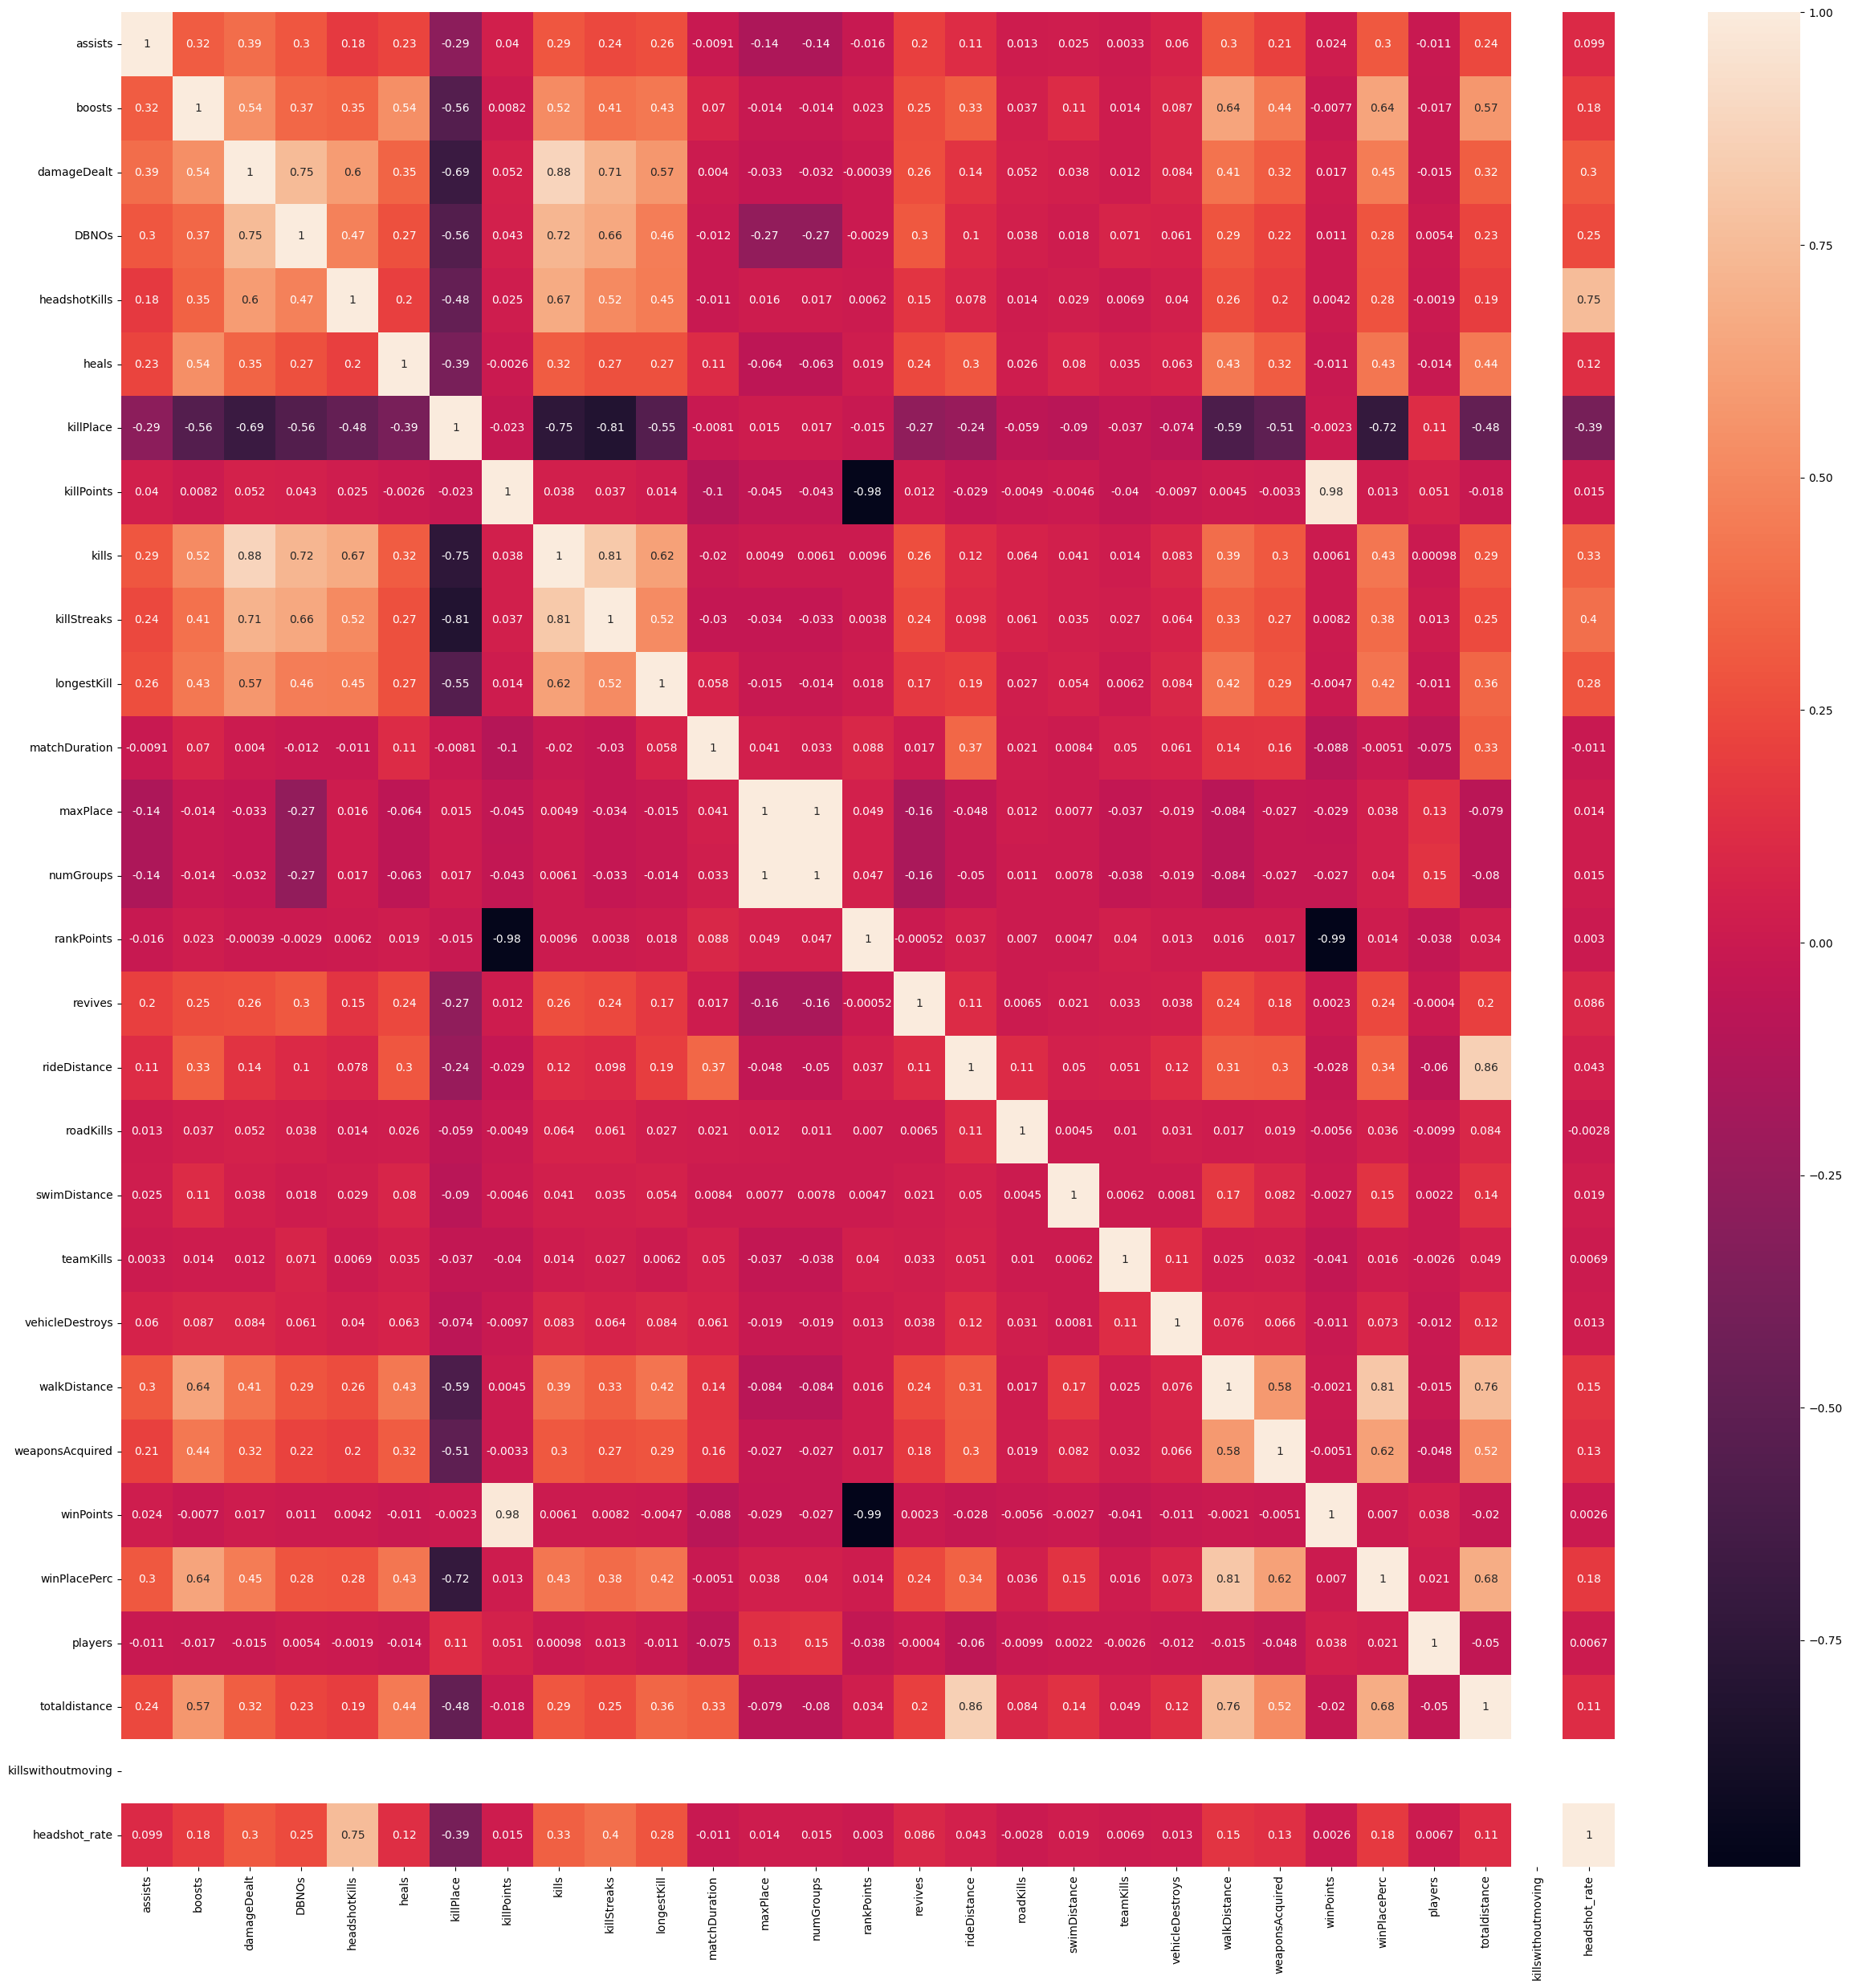

In [30]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)


# Feature Engineering<a class="anchor" id="import"></a>

In [31]:
normalising_factor = ((100-df['players'])/100)+1

In [32]:
normalising_factor

0          1.04
1          1.09
2          1.02
3          1.09
4          1.03
           ... 
4446961    1.06
4446962    1.07
4446963    1.02
4446964    1.06
4446965    1.02
Name: players, Length: 4437644, dtype: float64

In [33]:
df['killsnorm']=df['kills']*normalising_factor
df['damageDealtnorm']=df['damageDealt']*normalising_factor
df['maxplacenorm']=df['maxPlace']*normalising_factor
df['matchdurationnorm']=df['matchDuration']*normalising_factor

df['travelDistance']=df['walkDistance']+df['swimDistance']+df['rideDistance']
df['healsnboosts']=df['heals']+df['boosts']
df['assist']=df['assists']+df['revives']

In [34]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'players',
       'totaldistance', 'killswithoutmoving', 'headshot_rate', 'killsnorm',
       'damageDealtnorm', 'maxplacenorm', 'matchdurationnorm',
       'travelDistance', 'healsnboosts', 'assist'],
      dtype='object')

In [35]:
data=df.drop(columns=['Id','groupId','matchId','assists','boosts','walkDistance','swimDistance','rideDistance','heals','revives','kills','damageDealt','maxPlace','matchDuration'])

In [36]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totaldistance,killswithoutmoving,headshot_rate,killsnorm,damageDealtnorm,maxplacenorm,matchdurationnorm,travelDistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,29.12,1358.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,99.7023,28.34,1936.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,69.3600,51.00,1344.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,35.8610,33.79,1565.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,1.03,103.0000,99.91,1466.72,49.7500,0,0


# ML Catboost Model<a class="anchor" id="import"></a>

In [37]:
x=data.drop(['winPlacePerc'],axis=1)
y=data['winPlacePerc']

In [38]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totaldistance,killswithoutmoving,headshot_rate,killsnorm,damageDealtnorm,maxplacenorm,matchdurationnorm,travelDistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,29.12,1358.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,99.7023,28.34,1936.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,69.3600,51.00,1344.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,35.8610,33.79,1565.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,1.03,103.0000,99.91,1466.72,49.7500,0,0


In [39]:
features=x.columns

In [40]:
x=pd.get_dummies(x,columns=['matchType','killswithoutmoving'])

In [41]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killswithoutmoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,57,0,0,0.00,25,1484,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,47,0,0,0.00,47,1491,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,75,0,0,0.00,30,1408,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,45,0,1,58.53,95,1560,0,0,...,0,0,0,0,0,0,1,0,0,1


In [42]:
data['matchType'].value_counts()

squad-fpp           1755095
duo-fpp              996213
squad                625526
solo-fpp             536352
duo                  313289
solo                 181570
normal-squad-fpp      13278
crashfpp               6274
normal-duo-fpp         5016
flaretpp               2498
normal-solo-fpp         854
flarefpp                718
crashtpp                367
normal-squad            315
normal-duo              144
normal-solo             135
Name: matchType, dtype: int64

In [43]:
x.shape

(4437644, 40)

### Scaling the data

In [44]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x))

In [45]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.582894,-0.38418,0.449553,1.172537,-0.765165,-0.459688,-0.732768,-1.212392,-0.049572,-0.14253,...,-0.033639,-0.005516,-0.013874,-0.008425,-0.054782,-0.206546,-0.370784,-0.405079,1.236299,0.0
1,-0.582894,-0.38418,0.340262,-0.804726,-0.765165,-0.459688,-0.775739,0.803565,-0.049572,-0.14253,...,-0.033639,-0.005516,-0.013874,-0.008425,-0.054782,-0.206546,-0.370784,-0.405079,1.236299,0.0
2,-0.582894,-0.38418,-0.024042,-0.804726,-0.765165,-0.459688,0.169628,0.813068,-0.049572,-0.14253,...,-0.033639,-0.005516,-0.013874,-0.008425,-0.054782,-0.206546,-0.370784,-0.405079,-0.808866,0.0
3,-0.582894,-0.38418,0.996009,-0.804726,-0.765165,-0.459688,-0.560883,0.700391,-0.049572,-0.14253,...,-0.033639,-0.005516,-0.013874,-0.008425,-0.054782,-0.206546,-0.370784,-0.405079,1.236299,0.0
4,-0.582894,-0.38418,-0.096903,-0.804726,0.647482,0.727132,2.232247,0.906738,-0.049572,-0.14253,...,-0.033639,-0.005516,-0.013874,-0.008425,-0.054782,-0.206546,2.696990,-0.405079,-0.808866,0.0


### Splitting Data

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [47]:
x_train.shape

(3106350, 40)

In [48]:
x_test.shape

(1331294, 40)

In [49]:
y_train.shape

(3106350,)

## Catboost Model

In [50]:
import catboost as cb

In [51]:
train_data=cb.Pool(x_train,y_train)
test_data=cb.Pool(x_test,y_test)

In [52]:
model=cb.CatBoostRegressor(loss_function='RMSE')

In [53]:
# GRID SEARCH

grid={'iterations':[100,110],
     'learning_rate':[0.03,0.1],
     'depth':[2,4,6,8]}

model.grid_search(grid,train_data)

0:	learn: 0.5483576	test: 0.5485679	best: 0.5485679 (0)	total: 387ms	remaining: 38.3s
1:	learn: 0.5334860	test: 0.5336894	best: 0.5336894 (1)	total: 569ms	remaining: 27.9s
2:	learn: 0.5191129	test: 0.5193051	best: 0.5193051 (2)	total: 762ms	remaining: 24.6s
3:	learn: 0.5052165	test: 0.5054000	best: 0.5054000 (3)	total: 956ms	remaining: 22.9s
4:	learn: 0.4917583	test: 0.4919343	best: 0.4919343 (4)	total: 1.15s	remaining: 21.8s
5:	learn: 0.4787294	test: 0.4788941	best: 0.4788941 (5)	total: 1.35s	remaining: 21.1s
6:	learn: 0.4661329	test: 0.4662902	best: 0.4662902 (6)	total: 1.53s	remaining: 20.3s
7:	learn: 0.4539350	test: 0.4540829	best: 0.4540829 (7)	total: 1.71s	remaining: 19.7s
8:	learn: 0.4421132	test: 0.4422555	best: 0.4422555 (8)	total: 1.9s	remaining: 19.2s
9:	learn: 0.4307343	test: 0.4308693	best: 0.4308693 (9)	total: 2.08s	remaining: 18.8s
10:	learn: 0.4197108	test: 0.4198359	best: 0.4198359 (10)	total: 2.26s	remaining: 18.3s
11:	learn: 0.4090294	test: 0.4091488	best: 0.4091488 

94:	learn: 0.1398526	test: 0.1398453	best: 0.1398453 (94)	total: 17.6s	remaining: 925ms
95:	learn: 0.1394645	test: 0.1394586	best: 0.1394586 (95)	total: 17.7s	remaining: 739ms
96:	learn: 0.1390374	test: 0.1390307	best: 0.1390307 (96)	total: 17.9s	remaining: 555ms
97:	learn: 0.1386710	test: 0.1386658	best: 0.1386658 (97)	total: 18.1s	remaining: 369ms
98:	learn: 0.1383222	test: 0.1383186	best: 0.1383186 (98)	total: 18.3s	remaining: 185ms
99:	learn: 0.1379700	test: 0.1379675	best: 0.1379675 (99)	total: 18.4s	remaining: 0us

bestTest = 0.137967544
bestIteration = 99

0:	loss: 0.1379675	best: 0.1379675 (0)	total: 20.9s	remaining: 5m 12s
0:	learn: 0.5127495	test: 0.5129361	best: 0.5129361 (0)	total: 195ms	remaining: 19.3s
1:	learn: 0.4672395	test: 0.4674043	best: 0.4674043 (1)	total: 378ms	remaining: 18.5s
2:	learn: 0.4265345	test: 0.4266721	best: 0.4266721 (2)	total: 557ms	remaining: 18s
3:	learn: 0.3904821	test: 0.3905906	best: 0.3905906 (3)	total: 719ms	remaining: 17.3s
4:	learn: 0.358218

87:	learn: 0.1174035	test: 0.1174717	best: 0.1174717 (87)	total: 16.1s	remaining: 2.2s
88:	learn: 0.1172944	test: 0.1173636	best: 0.1173636 (88)	total: 16.3s	remaining: 2.02s
89:	learn: 0.1169618	test: 0.1170300	best: 0.1170300 (89)	total: 16.5s	remaining: 1.84s
90:	learn: 0.1167807	test: 0.1168481	best: 0.1168481 (90)	total: 16.7s	remaining: 1.65s
91:	learn: 0.1166644	test: 0.1167307	best: 0.1167307 (91)	total: 16.9s	remaining: 1.47s
92:	learn: 0.1165839	test: 0.1166508	best: 0.1166508 (92)	total: 17.1s	remaining: 1.28s
93:	learn: 0.1164886	test: 0.1165531	best: 0.1165531 (93)	total: 17.2s	remaining: 1.1s
94:	learn: 0.1164084	test: 0.1164734	best: 0.1164734 (94)	total: 17.4s	remaining: 915ms
95:	learn: 0.1163189	test: 0.1163844	best: 0.1163844 (95)	total: 17.5s	remaining: 731ms
96:	learn: 0.1162225	test: 0.1162912	best: 0.1162912 (96)	total: 17.7s	remaining: 548ms
97:	learn: 0.1161538	test: 0.1162230	best: 0.1162230 (97)	total: 17.9s	remaining: 365ms
98:	learn: 0.1160626	test: 0.11613

81:	learn: 0.1466812	test: 0.1466648	best: 0.1466648 (81)	total: 15.1s	remaining: 5.17s
82:	learn: 0.1460483	test: 0.1460325	best: 0.1460325 (82)	total: 15.3s	remaining: 4.98s
83:	learn: 0.1454460	test: 0.1454318	best: 0.1454318 (83)	total: 15.5s	remaining: 4.79s
84:	learn: 0.1448127	test: 0.1447982	best: 0.1447982 (84)	total: 15.7s	remaining: 4.61s
85:	learn: 0.1442502	test: 0.1442374	best: 0.1442374 (85)	total: 15.8s	remaining: 4.42s
86:	learn: 0.1437128	test: 0.1437009	best: 0.1437009 (86)	total: 16s	remaining: 4.23s
87:	learn: 0.1431970	test: 0.1431872	best: 0.1431872 (87)	total: 16.2s	remaining: 4.05s
88:	learn: 0.1426453	test: 0.1426352	best: 0.1426352 (88)	total: 16.4s	remaining: 3.86s
89:	learn: 0.1421651	test: 0.1421563	best: 0.1421563 (89)	total: 16.6s	remaining: 3.68s
90:	learn: 0.1417095	test: 0.1417018	best: 0.1417018 (90)	total: 16.7s	remaining: 3.5s
91:	learn: 0.1412552	test: 0.1412477	best: 0.1412477 (91)	total: 16.9s	remaining: 3.31s
92:	learn: 0.1407702	test: 0.140761

65:	learn: 0.1214058	test: 0.1214635	best: 0.1214635 (65)	total: 12.9s	remaining: 8.6s
66:	learn: 0.1209342	test: 0.1209899	best: 0.1209899 (66)	total: 13.1s	remaining: 8.41s
67:	learn: 0.1207854	test: 0.1208414	best: 0.1208414 (67)	total: 13.3s	remaining: 8.24s
68:	learn: 0.1206113	test: 0.1206712	best: 0.1206712 (68)	total: 13.5s	remaining: 8.04s
69:	learn: 0.1204611	test: 0.1205199	best: 0.1205199 (69)	total: 13.7s	remaining: 7.83s
70:	learn: 0.1203157	test: 0.1203759	best: 0.1203759 (70)	total: 13.9s	remaining: 7.62s
71:	learn: 0.1201525	test: 0.1202153	best: 0.1202153 (71)	total: 14.1s	remaining: 7.42s
72:	learn: 0.1200260	test: 0.1200890	best: 0.1200890 (72)	total: 14.2s	remaining: 7.21s
73:	learn: 0.1199085	test: 0.1199707	best: 0.1199707 (73)	total: 14.4s	remaining: 7.01s
74:	learn: 0.1197996	test: 0.1198626	best: 0.1198626 (74)	total: 14.6s	remaining: 6.8s
75:	learn: 0.1196660	test: 0.1197292	best: 0.1197292 (75)	total: 14.8s	remaining: 6.6s
76:	learn: 0.1195316	test: 0.119593

48:	learn: 0.1803887	test: 0.1803688	best: 0.1803688 (48)	total: 12.7s	remaining: 13.2s
49:	learn: 0.1776504	test: 0.1776310	best: 0.1776310 (49)	total: 13s	remaining: 13s
50:	learn: 0.1748962	test: 0.1748763	best: 0.1748763 (50)	total: 13.2s	remaining: 12.7s
51:	learn: 0.1723591	test: 0.1723389	best: 0.1723389 (51)	total: 13.4s	remaining: 12.4s
52:	learn: 0.1699549	test: 0.1699365	best: 0.1699365 (52)	total: 13.7s	remaining: 12.1s
53:	learn: 0.1675653	test: 0.1675475	best: 0.1675475 (53)	total: 13.9s	remaining: 11.8s
54:	learn: 0.1653052	test: 0.1652884	best: 0.1652884 (54)	total: 14.1s	remaining: 11.6s
55:	learn: 0.1630125	test: 0.1629957	best: 0.1629957 (55)	total: 14.4s	remaining: 11.3s
56:	learn: 0.1609240	test: 0.1609054	best: 0.1609054 (56)	total: 14.6s	remaining: 11s
57:	learn: 0.1589258	test: 0.1589102	best: 0.1589102 (57)	total: 14.9s	remaining: 10.8s
58:	learn: 0.1569825	test: 0.1569686	best: 0.1569686 (58)	total: 15.1s	remaining: 10.5s
59:	learn: 0.1551704	test: 0.1551598	b

42:	learn: 0.1110650	test: 0.1111381	best: 0.1111381 (42)	total: 9.85s	remaining: 13.1s
43:	learn: 0.1104318	test: 0.1105024	best: 0.1105024 (43)	total: 10.1s	remaining: 12.8s
44:	learn: 0.1100025	test: 0.1100697	best: 0.1100697 (44)	total: 10.3s	remaining: 12.6s
45:	learn: 0.1093587	test: 0.1094306	best: 0.1094306 (45)	total: 10.5s	remaining: 12.4s
46:	learn: 0.1090797	test: 0.1091554	best: 0.1091554 (46)	total: 10.7s	remaining: 12.1s
47:	learn: 0.1088333	test: 0.1089091	best: 0.1089091 (47)	total: 10.9s	remaining: 11.9s
48:	learn: 0.1086083	test: 0.1086887	best: 0.1086887 (48)	total: 11.2s	remaining: 11.6s
49:	learn: 0.1077403	test: 0.1078181	best: 0.1078181 (49)	total: 11.4s	remaining: 11.4s
50:	learn: 0.1072727	test: 0.1073421	best: 0.1073421 (50)	total: 11.6s	remaining: 11.2s
51:	learn: 0.1066795	test: 0.1067504	best: 0.1067504 (51)	total: 11.9s	remaining: 11s
52:	learn: 0.1062647	test: 0.1063430	best: 0.1063430 (52)	total: 12.1s	remaining: 10.7s
53:	learn: 0.1058023	test: 0.10588

35:	learn: 0.2284322	test: 0.2284223	best: 0.2284223 (35)	total: 8.29s	remaining: 17s
36:	learn: 0.2238368	test: 0.2238222	best: 0.2238222 (36)	total: 8.51s	remaining: 16.8s
37:	learn: 0.2194387	test: 0.2194238	best: 0.2194238 (37)	total: 8.73s	remaining: 16.6s
38:	learn: 0.2151803	test: 0.2151638	best: 0.2151638 (38)	total: 8.98s	remaining: 16.4s
39:	learn: 0.2111037	test: 0.2110881	best: 0.2110881 (39)	total: 9.21s	remaining: 16.1s
40:	learn: 0.2071478	test: 0.2071321	best: 0.2071321 (40)	total: 9.44s	remaining: 15.9s
41:	learn: 0.2032465	test: 0.2032292	best: 0.2032292 (41)	total: 9.67s	remaining: 15.7s
42:	learn: 0.1996293	test: 0.1996095	best: 0.1996095 (42)	total: 9.89s	remaining: 15.4s
43:	learn: 0.1961550	test: 0.1961351	best: 0.1961351 (43)	total: 10.1s	remaining: 15.2s
44:	learn: 0.1927871	test: 0.1927676	best: 0.1927676 (44)	total: 10.3s	remaining: 14.9s
45:	learn: 0.1894287	test: 0.1894081	best: 0.1894081 (45)	total: 10.6s	remaining: 14.7s
46:	learn: 0.1863074	test: 0.18628

18:	learn: 0.1471070	test: 0.1470964	best: 0.1470964 (18)	total: 4.4s	remaining: 21.1s
19:	learn: 0.1425071	test: 0.1424998	best: 0.1424998 (19)	total: 4.63s	remaining: 20.9s
20:	learn: 0.1386120	test: 0.1386151	best: 0.1386151 (20)	total: 4.87s	remaining: 20.7s
21:	learn: 0.1354473	test: 0.1354608	best: 0.1354608 (21)	total: 5.1s	remaining: 20.4s
22:	learn: 0.1326044	test: 0.1326176	best: 0.1326176 (22)	total: 5.33s	remaining: 20.2s
23:	learn: 0.1298416	test: 0.1298562	best: 0.1298562 (23)	total: 5.56s	remaining: 19.9s
24:	learn: 0.1272089	test: 0.1272271	best: 0.1272271 (24)	total: 5.78s	remaining: 19.7s
25:	learn: 0.1253259	test: 0.1253457	best: 0.1253457 (25)	total: 6s	remaining: 19.4s
26:	learn: 0.1237405	test: 0.1237692	best: 0.1237692 (26)	total: 6.21s	remaining: 19.1s
27:	learn: 0.1222377	test: 0.1222723	best: 0.1222723 (27)	total: 6.44s	remaining: 18.9s
28:	learn: 0.1209928	test: 0.1210317	best: 0.1210317 (28)	total: 6.66s	remaining: 18.6s
29:	learn: 0.1194973	test: 0.1195418	

0:	learn: 0.5478469	test: 0.5480568	best: 0.5480568 (0)	total: 325ms	remaining: 32.2s
1:	learn: 0.5324804	test: 0.5326834	best: 0.5326834 (1)	total: 647ms	remaining: 31.7s
2:	learn: 0.5175863	test: 0.5177802	best: 0.5177802 (2)	total: 954ms	remaining: 30.8s
3:	learn: 0.5031706	test: 0.5033494	best: 0.5033494 (3)	total: 1.25s	remaining: 29.9s
4:	learn: 0.4892077	test: 0.4893777	best: 0.4893777 (4)	total: 1.54s	remaining: 29.2s
5:	learn: 0.4756874	test: 0.4758496	best: 0.4758496 (5)	total: 1.85s	remaining: 29s
6:	learn: 0.4626083	test: 0.4627610	best: 0.4627610 (6)	total: 2.15s	remaining: 28.5s
7:	learn: 0.4499666	test: 0.4501107	best: 0.4501107 (7)	total: 2.44s	remaining: 28.1s
8:	learn: 0.4376998	test: 0.4378372	best: 0.4378372 (8)	total: 2.73s	remaining: 27.6s
9:	learn: 0.4257945	test: 0.4259264	best: 0.4259264 (9)	total: 3.02s	remaining: 27.1s
10:	learn: 0.4142371	test: 0.4143590	best: 0.4143590 (10)	total: 3.32s	remaining: 26.9s
11:	learn: 0.4031109	test: 0.4032238	best: 0.4032238 (

94:	learn: 0.1111582	test: 0.1112172	best: 0.1112172 (94)	total: 27.6s	remaining: 1.45s
95:	learn: 0.1107421	test: 0.1108035	best: 0.1108035 (95)	total: 27.8s	remaining: 1.16s
96:	learn: 0.1103145	test: 0.1103763	best: 0.1103763 (96)	total: 28.1s	remaining: 870ms
97:	learn: 0.1099340	test: 0.1099970	best: 0.1099970 (97)	total: 28.4s	remaining: 579ms
98:	learn: 0.1095730	test: 0.1096359	best: 0.1096359 (98)	total: 28.7s	remaining: 290ms
99:	learn: 0.1092284	test: 0.1092929	best: 0.1092929 (99)	total: 29s	remaining: 0us

bestTest = 0.1092928726
bestIteration = 99

8:	loss: 0.1092929	best: 0.0948678 (7)	total: 3m 30s	remaining: 2m 43s
0:	learn: 0.5109915	test: 0.5111767	best: 0.5111767 (0)	total: 343ms	remaining: 33.9s
1:	learn: 0.4636500	test: 0.4638157	best: 0.4638157 (1)	total: 647ms	remaining: 31.7s
2:	learn: 0.4213310	test: 0.4214526	best: 0.4214526 (2)	total: 940ms	remaining: 30.4s
3:	learn: 0.3834790	test: 0.3835776	best: 0.3835776 (3)	total: 1.23s	remaining: 29.5s
4:	learn: 0.3495

87:	learn: 0.0889049	test: 0.0890291	best: 0.0890291 (87)	total: 24.2s	remaining: 3.3s
88:	learn: 0.0888379	test: 0.0889630	best: 0.0889630 (88)	total: 24.5s	remaining: 3.02s
89:	learn: 0.0887760	test: 0.0889012	best: 0.0889012 (89)	total: 24.7s	remaining: 2.74s
90:	learn: 0.0886513	test: 0.0887780	best: 0.0887780 (90)	total: 25s	remaining: 2.47s
91:	learn: 0.0884541	test: 0.0885824	best: 0.0885824 (91)	total: 25.2s	remaining: 2.19s
92:	learn: 0.0883056	test: 0.0884379	best: 0.0884379 (92)	total: 25.5s	remaining: 1.92s
93:	learn: 0.0881712	test: 0.0883031	best: 0.0883031 (93)	total: 25.8s	remaining: 1.65s
94:	learn: 0.0880729	test: 0.0882037	best: 0.0882037 (94)	total: 26.1s	remaining: 1.37s
95:	learn: 0.0879774	test: 0.0881064	best: 0.0881064 (95)	total: 26.4s	remaining: 1.1s
96:	learn: 0.0879257	test: 0.0880542	best: 0.0880542 (96)	total: 26.6s	remaining: 823ms
97:	learn: 0.0878460	test: 0.0879754	best: 0.0879754 (97)	total: 26.9s	remaining: 549ms
98:	learn: 0.0877997	test: 0.0879288

80:	learn: 0.1196038	test: 0.1196421	best: 0.1196421 (80)	total: 23.7s	remaining: 8.47s
81:	learn: 0.1187621	test: 0.1188010	best: 0.1188010 (81)	total: 23.9s	remaining: 8.18s
82:	learn: 0.1180855	test: 0.1181263	best: 0.1181263 (82)	total: 24.2s	remaining: 7.88s
83:	learn: 0.1174189	test: 0.1174624	best: 0.1174624 (83)	total: 24.5s	remaining: 7.58s
84:	learn: 0.1167908	test: 0.1168368	best: 0.1168368 (84)	total: 24.8s	remaining: 7.28s
85:	learn: 0.1161975	test: 0.1162444	best: 0.1162444 (85)	total: 25s	remaining: 6.98s
86:	learn: 0.1155913	test: 0.1156411	best: 0.1156411 (86)	total: 25.3s	remaining: 6.69s
87:	learn: 0.1149312	test: 0.1149818	best: 0.1149818 (87)	total: 25.6s	remaining: 6.4s
88:	learn: 0.1142990	test: 0.1143529	best: 0.1143529 (88)	total: 25.9s	remaining: 6.11s
89:	learn: 0.1137870	test: 0.1138439	best: 0.1138439 (89)	total: 26.2s	remaining: 5.81s
90:	learn: 0.1132014	test: 0.1132568	best: 0.1132568 (90)	total: 26.5s	remaining: 5.52s
91:	learn: 0.1127061	test: 0.112764

63:	learn: 0.0923370	test: 0.0924467	best: 0.0924467 (63)	total: 19.3s	remaining: 13.9s
64:	learn: 0.0922351	test: 0.0923462	best: 0.0923462 (64)	total: 19.6s	remaining: 13.6s
65:	learn: 0.0920623	test: 0.0921782	best: 0.0921782 (65)	total: 20s	remaining: 13.3s
66:	learn: 0.0917650	test: 0.0918823	best: 0.0918823 (66)	total: 20.3s	remaining: 13s
67:	learn: 0.0916216	test: 0.0917381	best: 0.0917381 (67)	total: 20.7s	remaining: 12.8s
68:	learn: 0.0914910	test: 0.0916062	best: 0.0916062 (68)	total: 21s	remaining: 12.5s
69:	learn: 0.0913520	test: 0.0914698	best: 0.0914698 (69)	total: 21.3s	remaining: 12.2s
70:	learn: 0.0912355	test: 0.0913543	best: 0.0913543 (70)	total: 21.5s	remaining: 11.8s
71:	learn: 0.0911586	test: 0.0912764	best: 0.0912764 (71)	total: 21.8s	remaining: 11.5s
72:	learn: 0.0909775	test: 0.0910944	best: 0.0910944 (72)	total: 22.1s	remaining: 11.2s
73:	learn: 0.0907961	test: 0.0909121	best: 0.0909121 (73)	total: 22.4s	remaining: 10.9s
74:	learn: 0.0906686	test: 0.0907873	b

46:	learn: 0.1732122	test: 0.1732270	best: 0.1732270 (46)	total: 17s	remaining: 19.2s
47:	learn: 0.1699840	test: 0.1699987	best: 0.1699987 (47)	total: 17.4s	remaining: 18.8s
48:	learn: 0.1669179	test: 0.1669330	best: 0.1669330 (48)	total: 17.7s	remaining: 18.5s
49:	learn: 0.1638717	test: 0.1638844	best: 0.1638844 (49)	total: 18.1s	remaining: 18.1s
50:	learn: 0.1609968	test: 0.1610106	best: 0.1610106 (50)	total: 18.5s	remaining: 17.8s
51:	learn: 0.1582845	test: 0.1582988	best: 0.1582988 (51)	total: 18.8s	remaining: 17.4s
52:	learn: 0.1556233	test: 0.1556375	best: 0.1556375 (52)	total: 19.2s	remaining: 17s
53:	learn: 0.1531014	test: 0.1531197	best: 0.1531197 (53)	total: 19.5s	remaining: 16.6s
54:	learn: 0.1505904	test: 0.1506045	best: 0.1506045 (54)	total: 19.9s	remaining: 16.3s
55:	learn: 0.1482362	test: 0.1482496	best: 0.1482496 (55)	total: 20.3s	remaining: 16s
56:	learn: 0.1459870	test: 0.1460015	best: 0.1460015 (56)	total: 20.7s	remaining: 15.6s
57:	learn: 0.1438562	test: 0.1438726	b

39:	learn: 0.0939866	test: 0.0940919	best: 0.0940919 (39)	total: 14.8s	remaining: 22.1s
40:	learn: 0.0934506	test: 0.0935606	best: 0.0935606 (40)	total: 15.1s	remaining: 21.7s
41:	learn: 0.0931215	test: 0.0932295	best: 0.0932295 (41)	total: 15.5s	remaining: 21.3s
42:	learn: 0.0926226	test: 0.0927336	best: 0.0927336 (42)	total: 15.8s	remaining: 21s
43:	learn: 0.0921330	test: 0.0922497	best: 0.0922497 (43)	total: 16.2s	remaining: 20.6s
44:	learn: 0.0918347	test: 0.0919520	best: 0.0919520 (44)	total: 16.5s	remaining: 20.2s
45:	learn: 0.0913943	test: 0.0915185	best: 0.0915185 (45)	total: 16.9s	remaining: 19.9s
46:	learn: 0.0911737	test: 0.0912988	best: 0.0912988 (46)	total: 17.2s	remaining: 19.4s
47:	learn: 0.0908709	test: 0.0909951	best: 0.0909951 (47)	total: 17.6s	remaining: 19s
48:	learn: 0.0906375	test: 0.0907624	best: 0.0907624 (48)	total: 18s	remaining: 18.7s
49:	learn: 0.0902993	test: 0.0904319	best: 0.0904319 (49)	total: 18.3s	remaining: 18.3s
50:	learn: 0.0901179	test: 0.0902535	b

32:	learn: 0.2334040	test: 0.2334305	best: 0.2334305 (32)	total: 13.4s	remaining: 31.2s
33:	learn: 0.2280667	test: 0.2280918	best: 0.2280918 (33)	total: 13.8s	remaining: 30.8s
34:	learn: 0.2228636	test: 0.2228892	best: 0.2228892 (34)	total: 14.3s	remaining: 30.6s
35:	learn: 0.2178188	test: 0.2178420	best: 0.2178420 (35)	total: 14.7s	remaining: 30.3s
36:	learn: 0.2129625	test: 0.2129791	best: 0.2129791 (36)	total: 15.1s	remaining: 29.9s
37:	learn: 0.2082737	test: 0.2082902	best: 0.2082902 (37)	total: 15.6s	remaining: 29.5s
38:	learn: 0.2037738	test: 0.2037867	best: 0.2037867 (38)	total: 16s	remaining: 29.1s
39:	learn: 0.1994512	test: 0.1994661	best: 0.1994661 (39)	total: 16.4s	remaining: 28.7s
40:	learn: 0.1952549	test: 0.1952671	best: 0.1952671 (40)	total: 16.8s	remaining: 28.3s
41:	learn: 0.1912269	test: 0.1912396	best: 0.1912396 (41)	total: 17.2s	remaining: 27.9s
42:	learn: 0.1873253	test: 0.1873397	best: 0.1873397 (42)	total: 17.6s	remaining: 27.5s
43:	learn: 0.1835827	test: 0.18359

15:	learn: 0.1501041	test: 0.1501073	best: 0.1501073 (15)	total: 7.07s	remaining: 41.5s
16:	learn: 0.1425129	test: 0.1425277	best: 0.1425277 (16)	total: 7.47s	remaining: 40.9s
17:	learn: 0.1358607	test: 0.1358776	best: 0.1358776 (17)	total: 7.85s	remaining: 40.1s
18:	learn: 0.1302158	test: 0.1302403	best: 0.1302403 (18)	total: 8.22s	remaining: 39.4s
19:	learn: 0.1250530	test: 0.1250846	best: 0.1250846 (19)	total: 8.59s	remaining: 38.6s
20:	learn: 0.1205860	test: 0.1206279	best: 0.1206279 (20)	total: 8.98s	remaining: 38.1s
21:	learn: 0.1170329	test: 0.1170869	best: 0.1170869 (21)	total: 9.36s	remaining: 37.4s
22:	learn: 0.1139660	test: 0.1140277	best: 0.1140277 (22)	total: 9.71s	remaining: 36.7s
23:	learn: 0.1112432	test: 0.1113081	best: 0.1113081 (23)	total: 10.1s	remaining: 36.1s
24:	learn: 0.1090212	test: 0.1090935	best: 0.1090935 (24)	total: 10.4s	remaining: 35.5s
25:	learn: 0.1070693	test: 0.1071459	best: 0.1071459 (25)	total: 10.8s	remaining: 34.9s
26:	learn: 0.1052987	test: 0.105

109:	learn: 0.0837247	test: 0.0839159	best: 0.0839159 (109)	total: 40.2s	remaining: 0us

bestTest = 0.0839159256
bestIteration = 109

15:	loss: 0.0839159	best: 0.0839159 (15)	total: 7m 38s	remaining: 0us
Estimating final quality...
Training on fold [0/3]
0:	learn: 0.5105850	test: 0.5102089	best: 0.5102089 (0)	total: 314ms	remaining: 34.3s
1:	learn: 0.4629188	test: 0.4625826	best: 0.4625826 (1)	total: 634ms	remaining: 34.3s
2:	learn: 0.4202117	test: 0.4199131	best: 0.4199131 (2)	total: 934ms	remaining: 33.3s
3:	learn: 0.3819497	test: 0.3816893	best: 0.3816893 (3)	total: 1.22s	remaining: 32.4s
4:	learn: 0.3477488	test: 0.3475091	best: 0.3475091 (4)	total: 1.56s	remaining: 32.9s
5:	learn: 0.3174013	test: 0.3171929	best: 0.3171929 (5)	total: 1.88s	remaining: 32.5s
6:	learn: 0.2901541	test: 0.2899749	best: 0.2899749 (6)	total: 2.18s	remaining: 32.1s
7:	learn: 0.2659010	test: 0.2657455	best: 0.2657455 (7)	total: 2.5s	remaining: 31.9s
8:	learn: 0.2444288	test: 0.2442919	best: 0.2442919 (8)	to

91:	learn: 0.0850593	test: 0.0850542	best: 0.0850542 (91)	total: 27.4s	remaining: 5.36s
92:	learn: 0.0850009	test: 0.0849957	best: 0.0849957 (92)	total: 27.7s	remaining: 5.07s
93:	learn: 0.0849200	test: 0.0849160	best: 0.0849160 (93)	total: 28.1s	remaining: 4.78s
94:	learn: 0.0848598	test: 0.0848580	best: 0.0848580 (94)	total: 28.4s	remaining: 4.49s
95:	learn: 0.0847728	test: 0.0847707	best: 0.0847707 (95)	total: 28.8s	remaining: 4.19s
96:	learn: 0.0847068	test: 0.0847050	best: 0.0847050 (96)	total: 29.1s	remaining: 3.89s
97:	learn: 0.0846344	test: 0.0846334	best: 0.0846334 (97)	total: 29.3s	remaining: 3.59s
98:	learn: 0.0845738	test: 0.0845726	best: 0.0845726 (98)	total: 29.6s	remaining: 3.29s
99:	learn: 0.0845296	test: 0.0845277	best: 0.0845277 (99)	total: 29.9s	remaining: 2.99s
100:	learn: 0.0844817	test: 0.0844805	best: 0.0844805 (100)	total: 30.2s	remaining: 2.69s
101:	learn: 0.0844421	test: 0.0844392	best: 0.0844392 (101)	total: 30.5s	remaining: 2.39s
102:	learn: 0.0843733	test: 

74:	learn: 0.0865079	test: 0.0865014	best: 0.0865014 (74)	total: 30.8s	remaining: 14.4s
75:	learn: 0.0864028	test: 0.0863957	best: 0.0863957 (75)	total: 31.2s	remaining: 14s
76:	learn: 0.0862876	test: 0.0862797	best: 0.0862797 (76)	total: 31.5s	remaining: 13.5s
77:	learn: 0.0862193	test: 0.0862140	best: 0.0862140 (77)	total: 31.8s	remaining: 13.1s
78:	learn: 0.0860955	test: 0.0860897	best: 0.0860897 (78)	total: 32.2s	remaining: 12.6s
79:	learn: 0.0860005	test: 0.0859956	best: 0.0859956 (79)	total: 32.6s	remaining: 12.2s
80:	learn: 0.0859129	test: 0.0859080	best: 0.0859080 (80)	total: 33.1s	remaining: 11.8s
81:	learn: 0.0858243	test: 0.0858187	best: 0.0858187 (81)	total: 33.5s	remaining: 11.4s
82:	learn: 0.0857440	test: 0.0857390	best: 0.0857390 (82)	total: 33.9s	remaining: 11s
83:	learn: 0.0856375	test: 0.0856308	best: 0.0856308 (83)	total: 34.2s	remaining: 10.6s
84:	learn: 0.0855444	test: 0.0855362	best: 0.0855362 (84)	total: 34.5s	remaining: 10.2s
85:	learn: 0.0854851	test: 0.0854785

57:	learn: 0.0886513	test: 0.0888951	best: 0.0888951 (57)	total: 21.3s	remaining: 19.1s
58:	learn: 0.0885467	test: 0.0887910	best: 0.0887910 (58)	total: 21.6s	remaining: 18.7s
59:	learn: 0.0884318	test: 0.0886751	best: 0.0886751 (59)	total: 21.9s	remaining: 18.2s
60:	learn: 0.0882681	test: 0.0885124	best: 0.0885124 (60)	total: 22.2s	remaining: 17.8s
61:	learn: 0.0881388	test: 0.0883819	best: 0.0883819 (61)	total: 22.4s	remaining: 17.4s
62:	learn: 0.0879793	test: 0.0882256	best: 0.0882256 (62)	total: 22.7s	remaining: 17s
63:	learn: 0.0877706	test: 0.0880218	best: 0.0880218 (63)	total: 23.1s	remaining: 16.6s
64:	learn: 0.0876298	test: 0.0878841	best: 0.0878841 (64)	total: 23.4s	remaining: 16.2s
65:	learn: 0.0874170	test: 0.0876717	best: 0.0876717 (65)	total: 23.8s	remaining: 15.9s
66:	learn: 0.0872876	test: 0.0875431	best: 0.0875431 (66)	total: 24.1s	remaining: 15.5s
67:	learn: 0.0871240	test: 0.0873829	best: 0.0873829 (67)	total: 24.4s	remaining: 15.1s
68:	learn: 0.0869878	test: 0.08724

{'params': {'depth': 8, 'iterations': 110, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

### Prediction

In [55]:
pred=model.predict(x_test)

In [56]:
y_test[:10]

3923589    0.5435
3931880    0.2222
1988675    0.1458
4432835    0.4167
3279963    0.3958
2432551    0.0208
289718     0.9630
3407014    0.2500
1025213    0.0425
4278210    0.6211
Name: winPlacePerc, dtype: float64

In [57]:
pred[:10]

array([0.58884725, 0.10760673, 0.15382349, 0.48553902, 0.37434685,
       0.03466627, 0.85259252, 0.17868782, 0.02774739, 0.66129798])

In [58]:
rmse=np.sqrt(mean_squared_error(y_test,pred))
r2=r2_score(y_test,pred)

print("Testing performance")
print("RMSE:",rmse)
print("R2:",r2)

Testing performance
RMSE: 0.08375730565617028
R2: 0.9256497100720146
